# Election Data Project - Polls and Donors

In this Data Project we will be looking at data from the 2012 election in the USA.

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

1. Who was being polled and what was their party affiliation?
2. Did the poll results favor Romney or Obama?
3. How do undecided voters effect the poll?
4. Can we account for the undecided voters?
5. How did voter sentiment change over time?
6. Can we see an effect in the polls from the debates?

In [2]:
# Initial imports

# For data manipulation
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

# For division precision
from __future__ import division

# For importing data from the Web
import requests
from StringIO import StringIO

## Data Import

The data for the polls will be obtained from HuffPost Pollster. You can check their website on: http://elections.huffingtonpost.com/pollster.

In [3]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Get the data from the Web
source = requests.get(url).text

# Read and parse the data from the memory
poll_data = StringIO(source)

# Load the parsed data into a dataframe
poll_df = pd.read_csv(poll_data)

In [4]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 15 columns):
Pollster                  590 non-null object
Start Date                590 non-null object
End Date                  590 non-null object
Entry Date/Time (ET)      590 non-null object
Number of Observations    568 non-null float64
Population                590 non-null object
Mode                      590 non-null object
Obama                     590 non-null int64
Romney                    590 non-null int64
Other                     202 non-null float64
Undecided                 423 non-null float64
Pollster URL              590 non-null object
Source URL                588 non-null object
Partisan                  590 non-null object
Affiliation               590 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 69.2+ KB


In [5]:
poll_df.describe()

,Number of Observations,Obama,Romney,Other,Undecided
count,568.000000,590.000000,590.000000,202.000000,423.000000
mean,1295.394366,46.774576,44.572881,3.400990,6.546099
std,1616.239438,2.447069,2.925320,2.721318,3.698614
min,328.000000,37.000000,32.000000,0.000000,1.000000
25%,855.750000,45.000000,43.000000,2.000000,4.000000
50%,1000.000000,47.000000,45.000000,3.000000,6.000000
75%,1500.000000,48.000000,46.000000,4.000000,8.000000
max,36472.000000,54.000000,53.000000,19.000000,28.000000


In [6]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47,47,NaN,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48,48,NaN,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
2,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50,49,1.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47,47,NaN,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48,49,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


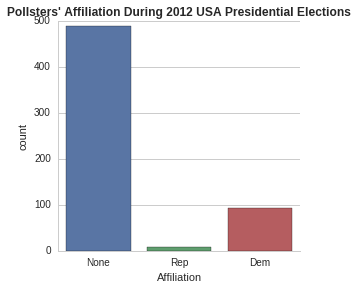

In [7]:
# Quick view of affiliations
sns.factorplot('Affiliation', data = poll_df, kind = 'count')
plt.title("Pollsters' Affiliation During 2012 USA Presidential Elections", weight = "bold")

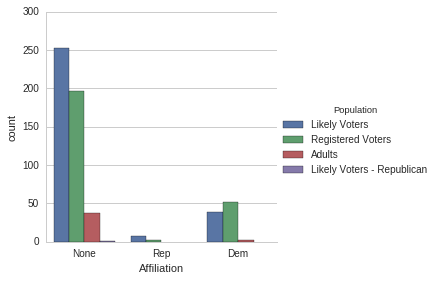

In [8]:
sns.factorplot('Affiliation', data = poll_df, kind = 'count', hue = 'Population')

In [9]:
# Analysis of average votes per candidate

# Get the average of all numeric columns of poll_df
avg = DataFrame(poll_df.mean())

# We drop the 'Number of Observations' columns since it's meanless for this analysis
avg.drop('Number of Observations', axis = 0, inplace = True)

In [10]:
avg

,0
Obama,46.774576
Romney,44.572881
Other,3.400990
Undecided,6.546099


In [11]:
# Now get the standar deviations
std = DataFrame(poll_df.std())
std.drop('Number of Observations', axis = 0, inplace = True)

In [12]:
std

,0
Obama,2.447069
Romney,2.925320
Other,2.721318
Undecided,3.698614


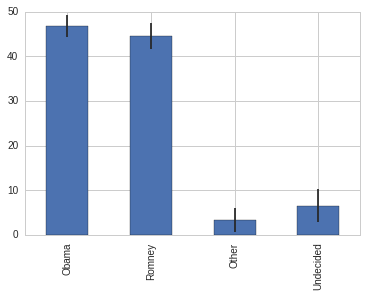

In [13]:
avg.plot(yerr = std, kind = 'bar', legend = False)

In [14]:
# Now we will create a new dataframe for further analysis of voting results
poll_avg = pd.concat([avg, std], axis = 1)

# Change columns names
poll_avg.columns = ['Average', 'STD']

In [15]:
poll_avg

,Average,STD
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Other,3.400990,2.721318
Undecided,6.546099,3.698614


## Time Series Analysis

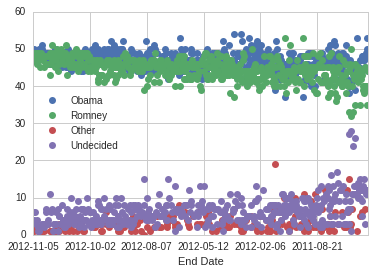

In [16]:
poll_df.plot(x = 'End Date', y = ['Obama', 'Romney', 'Other', 'Undecided'], linestyle = '', marker = 'o')

In [17]:
# Now we will analyse the differences between Obama and Romney voting preferences.

# We add a new column to analyse the diffence of voting preference across all the pollsters.
# A positive difference will mean a preference for Obama, a negative difference will mean a preference for Romney.
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

In [18]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47,47,NaN,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00
1,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48,48,NaN,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00
2,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50,49,1.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,0.01
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47,47,NaN,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,0.00
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48,49,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01


In [19]:
# Now we will group our dataframe by start date
poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()

In [20]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Other,Undecided,Difference
0,2009-03-13,1403.0,44.0,44.0,NaN,12.0,0.00
1,2009-04-17,686.0,50.0,39.0,NaN,11.0,0.11
2,2009-05-14,1000.0,53.0,35.0,NaN,12.0,0.18
3,2009-06-12,638.0,48.0,40.0,NaN,12.0,0.08
4,2009-07-15,577.0,49.0,40.0,NaN,11.0,0.09


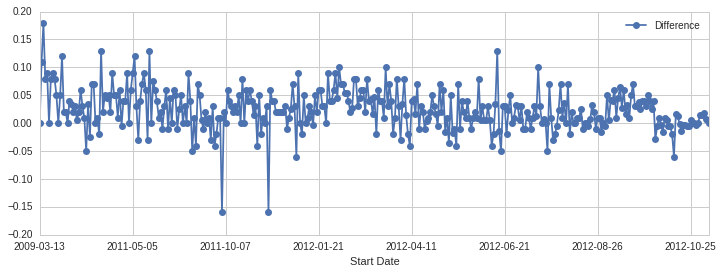

In [21]:
# Plot voting preference, remember:
#    A positive difference will mean a preference for Obama.
#    A negative difference will mean a preference for Romney.
poll_df.plot('Start Date', 'Difference', figsize = (12, 4), marker = 'o', linestyle = '-')

In [22]:
# Now we will make an analysis of October 2012

# We get the row indexes for all the rows that belongs to october
xlimit = [row_index for row_index in poll_df.index if poll_df['Start Date'][row_index][0:7] == '2012-10']

In [23]:
print min(xlimit) # First row of october
print max(xlimit) # Last row of october

329
356


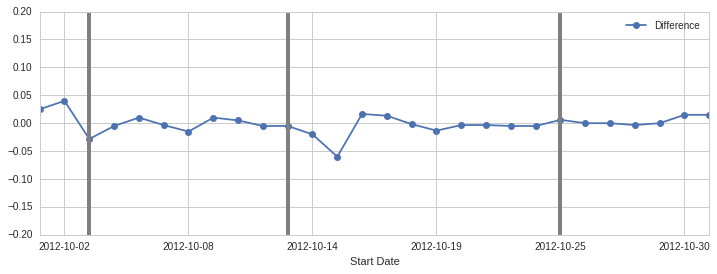

In [24]:
# Now we plot all the data from october
poll_df.plot('Start Date', 'Difference', figsize = (12, 4), marker = 'o', linestyle = '-', xlim = (329, 356))

# Now we will add vertical lines on the debate's dates to have tendency markers

# Oct 3rd
plt.axvline(x = 329 + 2, linewidth = 4, color = 'grey')
# Oct 11th
plt.axvline(x = 329 + 10, linewidth = 4, color = 'grey')
# Oct 22nd
plt.axvline(x = 329 + 21, linewidth = 4, color = 'grey')

## Donations Analysis

Let's go ahead and switch gears and take a look at a data set consisting of information on donations to the federal campaign.

This is going to be the biggest data set we've looked at so far. You can download it [here](https://www.dropbox.com/s/l29oppon2veaq4n/Election_Donor_Data.csv?dl=0), then make sure to save it to the same folder your iPython Notebooks are in.

The questions we will be trying to answer while looking at this Data Set is:

1. How much was donated and what was the average donation?
2. How did the donations differ between candidates?
3. How did the donations differ between Democrats and Republicans?
4. What were the demographics of the donors?
5. Is there a pattern to donation amounts?

In [25]:
# Load the data
donor_df = pd.read_csv("data/Election_Donor_Data.csv")

/home/jarturomora/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [27]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [28]:
# Let's see the different amount donated
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 236.07          1
 153.60          1
 116.35          1
 233.33          1
 86.21           1
 600.74          1
 130.20          1
 50.04           1
 78.55           1
 266.10          1
 77.83           1
 222.75          1
 217.75          1
 261.50          1
 240.25          1
-45.50           1
 161.50          1
 268.76          1
 100.56          1
 6.26            1
 114.43          1
 823.88     

In [29]:
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()

print "The average donation was $%0.2f with a STD of $%0.2f" % (don_mean, don_std)

The average donation was $298.24 with a STD of $3749.67


In [30]:
# Now let's analyse the top donors
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort_values(inplace = True)
top_donor # We will see negative values, they are refunds.

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [31]:
# Let's drop the refunds
top_donor = top_donor[top_donor > 0]

In [32]:
top_donor.sort_values(inplace = True)

In [33]:
# Top 10 most common donations amounts
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

In [34]:
# Top donors histogram
com_don = top_donor[top_donor < 2500]

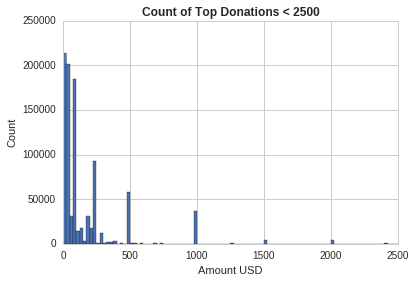

In [35]:
com_don.hist(bins = 100)
plt.xlabel("Amount USD")
plt.ylabel("Count")
plt.title("Count of Top Donations < 2500", weight = "bold")

In [36]:
# Donations by party and candidate

# We extract all the candidates names
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [37]:
# Now we will map each candidate on the data frame with his or her party adding a new column

# First we create a dictionary matching each candidate with his or her party.
party_map = {'Bachmann, Michelle': 'Republican',
            'Romney, Mitt': 'Republican',
            'Obama, Barack': 'Democrat',
            "Roemer, Charles E. 'Buddy' III": 'Republican',
            'Pawlenty, Timothy': 'Republican',
            'Johnson, Gary Earl': 'Republican',
            'Paul, Ron': 'Republican',
            'Santorum, Rick': 'Republican',
            'Cain, Herman': 'Republican',
            'Gingrich, Newt': 'Republican',
            'McCotter, Thaddeus G': 'Republican',
            'Huntsman, Jon': 'Republican',
            'Perry, Rick': 'Republican'
}

In [38]:
# Now we add the new column
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [39]:
# We will remove from the data frame all the negative contributions (refunds)
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

In [40]:
donor_df.head(10)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [41]:
# Count how many contributions received each candidate
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [42]:
# Amount of money rose by each candidate
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [43]:
# Making the amounts more readable
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

In [44]:
for idx, don in zip(xrange(len(cand_amount)), cand_amount):
    print 'The candidate %s raise $%0.0f USD' % (cand_amount.index[idx], don)

The candidate Bachmann, Michelle raise $2711439 USD
The candidate Cain, Herman raise $7101082 USD
The candidate Gingrich, Newt raise $12832770 USD
The candidate Huntsman, Jon raise $3330373 USD
The candidate Johnson, Gary Earl raise $566962 USD
The candidate McCotter, Thaddeus G raise $39030 USD
The candidate Obama, Barack raise $135877427 USD
The candidate Paul, Ron raise $21009620 USD
The candidate Pawlenty, Timothy raise $6004819 USD
The candidate Perry, Rick raise $20305754 USD
The candidate Roemer, Charles E. 'Buddy' III raise $373010 USD
The candidate Romney, Mitt raise $88335908 USD
The candidate Santorum, Rick raise $11043159 USD


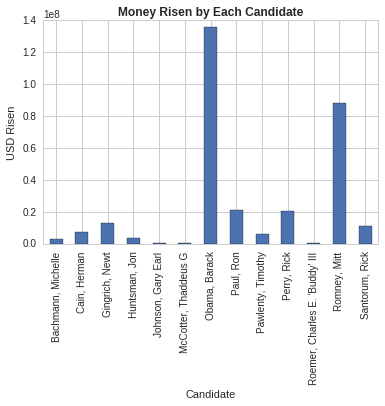

In [45]:
cand_amount.plot(kind = 'bar')
plt.xlabel('Candidate')
plt.ylabel('USD Risen')
plt.title('Money Risen by Each Candidate', weight = 'bold')

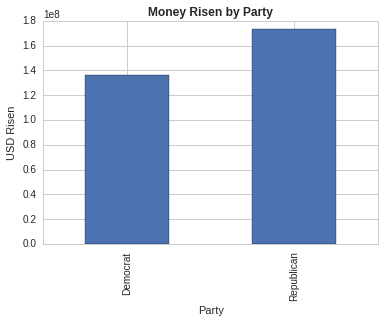

In [46]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind = 'bar')
plt.ylabel("USD Risen")
plt.title("Money Risen by Party", weight = "bold")

In [47]:
# Now we will analyse the donations by ocuppation

# We create a new data frame to count how many people by occupation support each party
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')

In [48]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [49]:
# Size of the data frame
occupation_df.shape

(45067, 2)

In [75]:
# We take only occupations that sum more than 1 million dollars.
top_occupation = occupation_df[occupation_df.sum(1) > 1000000]

In [59]:
top_occupation.shape

(31, 2)

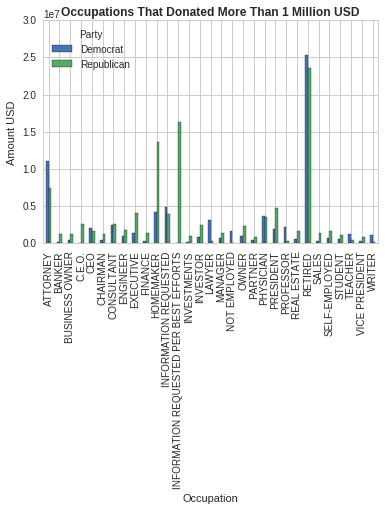

In [62]:
top_occupation.plot(kind = 'bar')
plt.xlabel("Occupation")
plt.ylabel("Amount USD")
plt.title("Occupations That Donated More Than 1 Million USD", weight = "bold")

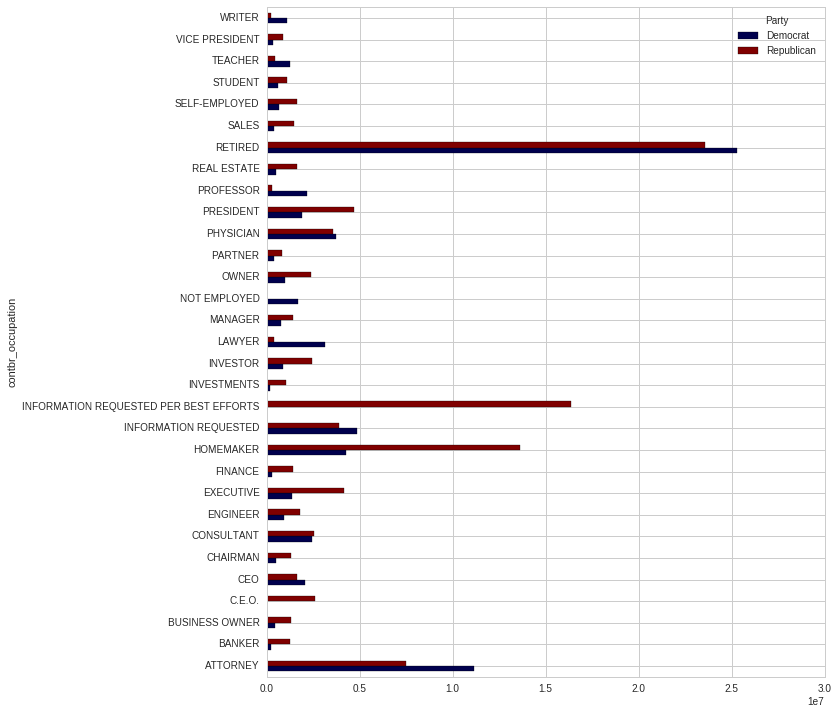

In [70]:
top_occupation.plot(kind = "barh", figsize = (10,12), cmap = "seismic")

In [76]:
# Remove incorrect occupations
top_occupation.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'], axis = 0, inplace = True)

/home/jarturomora/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [77]:
# Merge CEO and C.E.O. columns
top_occupation.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
top_occupation.drop('C.E.O.', inplace = True)

/home/jarturomora/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/jarturomora/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


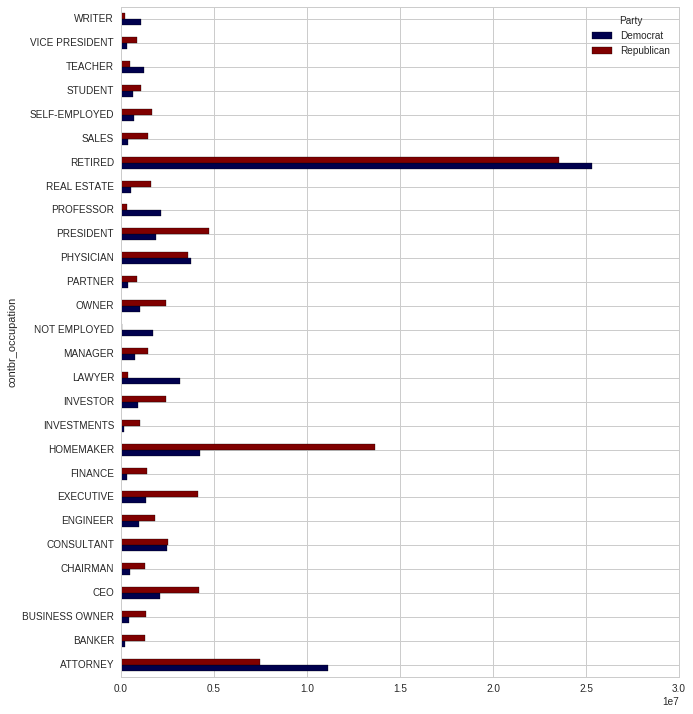

In [78]:
top_occupation.plot(kind = "barh", figsize = (10,12), cmap = "seismic")